In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\bandagedress-uk.xlsx")


In [3]:
d

,TREND,START_DATE,FSI
0,Bandage Dress Uk,2016-01-04,0.18687
1,Bandage Dress Uk,2016-01-11,0.18239
2,Bandage Dress Uk,2016-01-18,0.17943
3,Bandage Dress Uk,2016-01-25,0.18021
4,Bandage Dress Uk,2016-02-01,0.18021
...,...,...,...
286,Bandage Dress Uk,2021-06-28,0.10202
287,Bandage Dress Uk,2021-07-05,0.10636
288,Bandage Dress Uk,2021-07-12,0.10620
289,Bandage Dress Uk,2021-07-19,0.10655


In [4]:
d=d.iloc[:, [1,2]]

In [5]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [6]:
df

,ds,y
0,2016-01-04,0.18687
1,2016-01-11,0.18239
2,2016-01-18,0.17943
3,2016-01-25,0.18021
4,2016-02-01,0.18021
...,...,...
286,2021-06-28,0.10202
287,2021-07-05,0.10636
288,2021-07-12,0.10620
289,2021-07-19,0.10655


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


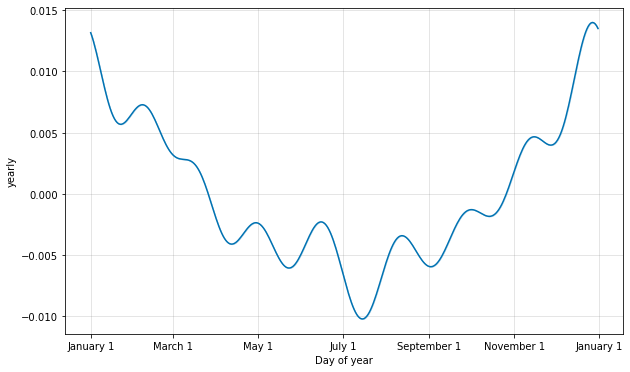

In [7]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


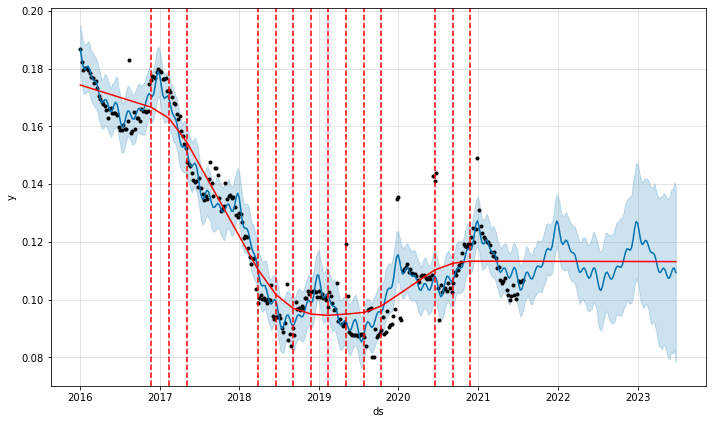

In [9]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


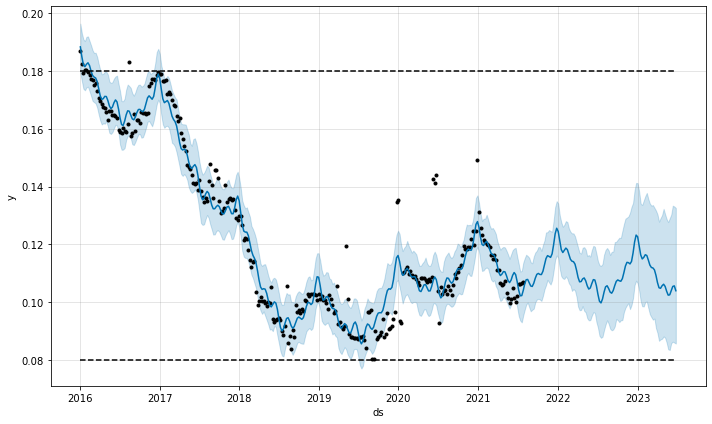

In [10]:
#logitsic, caps floors 
df['cap'] = 0.18
df['floor'] = 0.08
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.5, growth='logistic')

m.fit(df)
q=m.predict(df)
future = m.make_future_dataframe(periods=100, freq='W')
future['cap'] = 0.18
future['floor'] = 0.08
fcst = m.predict(future)
fig = m.plot(fcst)

In [11]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2018-02-07 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000104,0.010199,0.008696,0.087458,0.093115,0.085155,0.258065
1,37 days,0.000101,0.010062,0.008493,0.085595,0.091143,0.083460,0.290323
2,39 days,0.000106,0.010301,0.008848,0.090116,0.093115,0.087622,0.258065
3,40 days,0.000105,0.010244,0.008753,0.088647,0.093115,0.086249,0.258065
4,41 days,0.000110,0.010484,0.009107,0.091936,0.102959,0.089766,0.225806


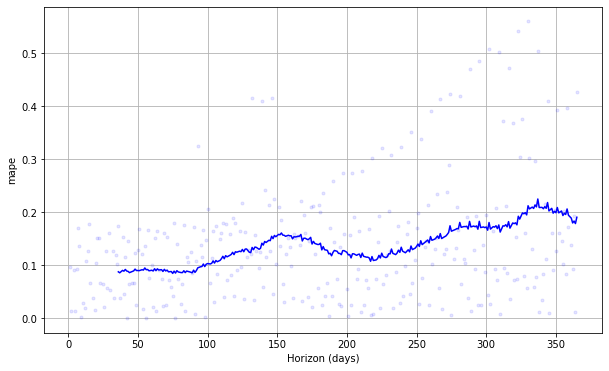

In [13]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')